In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/DataRisaralda_v2Numeric_Complete_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')
#df_compact = pd.read_csv('./data/df_compact_2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')




print df.shape
#print df_compact.shape

(746, 86)


In [10]:
cols = [
"DefectosTotales"
,"ASNM"
,"Luminosidad"
,"prec1","prec2","prec3","prec4","prec5","prec6","prec7","prec8","prec9","prec10"
,"tmin1","tmin2","tmin3","tmin4","tmin5","tmin6","tmin7","tmin8","tmin9","tmin10"
,"tmax1","tmax2","tmax3","tmax4","tmax5","tmax6","tmax7","tmax8","tmax9","tmax10"
,"tmean1","tmean2","tmean3","tmean4","tmean5","tmean6","tmean7","tmean8","tmean9","tmean10"
,"dtr1","dtr2","dtr3","dtr4","dtr5","dtr6","dtr7","dtr8","dtr9","dtr10"
,"PrecTotal","TminTotal","TmaxTotal","TmeanTotal","DtrTotal"
,"PrecTotalAvg","TminTotalAvg","TmaxTotalAvg","TmeanTotalAvg","DtrTotalAvg"
,"OrientationNum"
,"Slope"
,"pH_avg"
,"org_avg"
,"Franco"
,"Arcilloso"
,"Limoso"
,"Arenoso"
,"Cascajoso"
,"Aroma-Fragancia","Acidez","Cuerpo","Sabor","SaborResidual","Dulzor","Uniformidad","Balance","TazaLimpia","PuntajeCatador","PuntajeTotal"
,"Category"]



inputs = [
"ASNM"
,"Luminosidad"
,"prec1","prec2","prec3","prec4","prec5","prec6","prec7","prec8","prec9","prec10"
,"tmin1","tmin2","tmin3","tmin4","tmin5","tmin6","tmin7","tmin8","tmin9","tmin10"
,"tmax1","tmax2","tmax3","tmax4","tmax5","tmax6","tmax7","tmax8","tmax9","tmax10"
,"tmean1","tmean2","tmean3","tmean4","tmean5","tmean6","tmean7","tmean8","tmean9","tmean10"
,"dtr1","dtr2","dtr3","dtr4","dtr5","dtr6","dtr7","dtr8","dtr9","dtr10"
,"PrecTotal","TminTotal","TmaxTotal","TmeanTotal","DtrTotal"
,"PrecTotalAvg","TminTotalAvg","TmaxTotalAvg","TmeanTotalAvg","DtrTotalAvg"
,"OrientationNum"
,"Slope"
,"pH_avg"
,"org_avg"
,"Franco"
,"Arcilloso"
,"Limoso"
,"Arenoso"
,"Cascajoso"]

outputs = ["DefectosTotales","Aroma-Fragancia","Acidez",
           "Cuerpo","Sabor","SaborResidual","Dulzor",
           "Uniformidad","Balance","TazaLimpia","PuntajeCatador","PuntajeTotal",
           "Category"]

main_outputs = ['Acidez','Dulzor','PuntajeTotal']

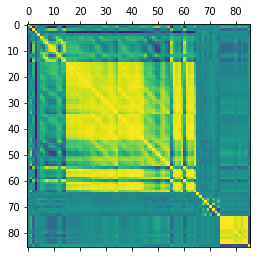

In [5]:
plt.matshow(df.corr())

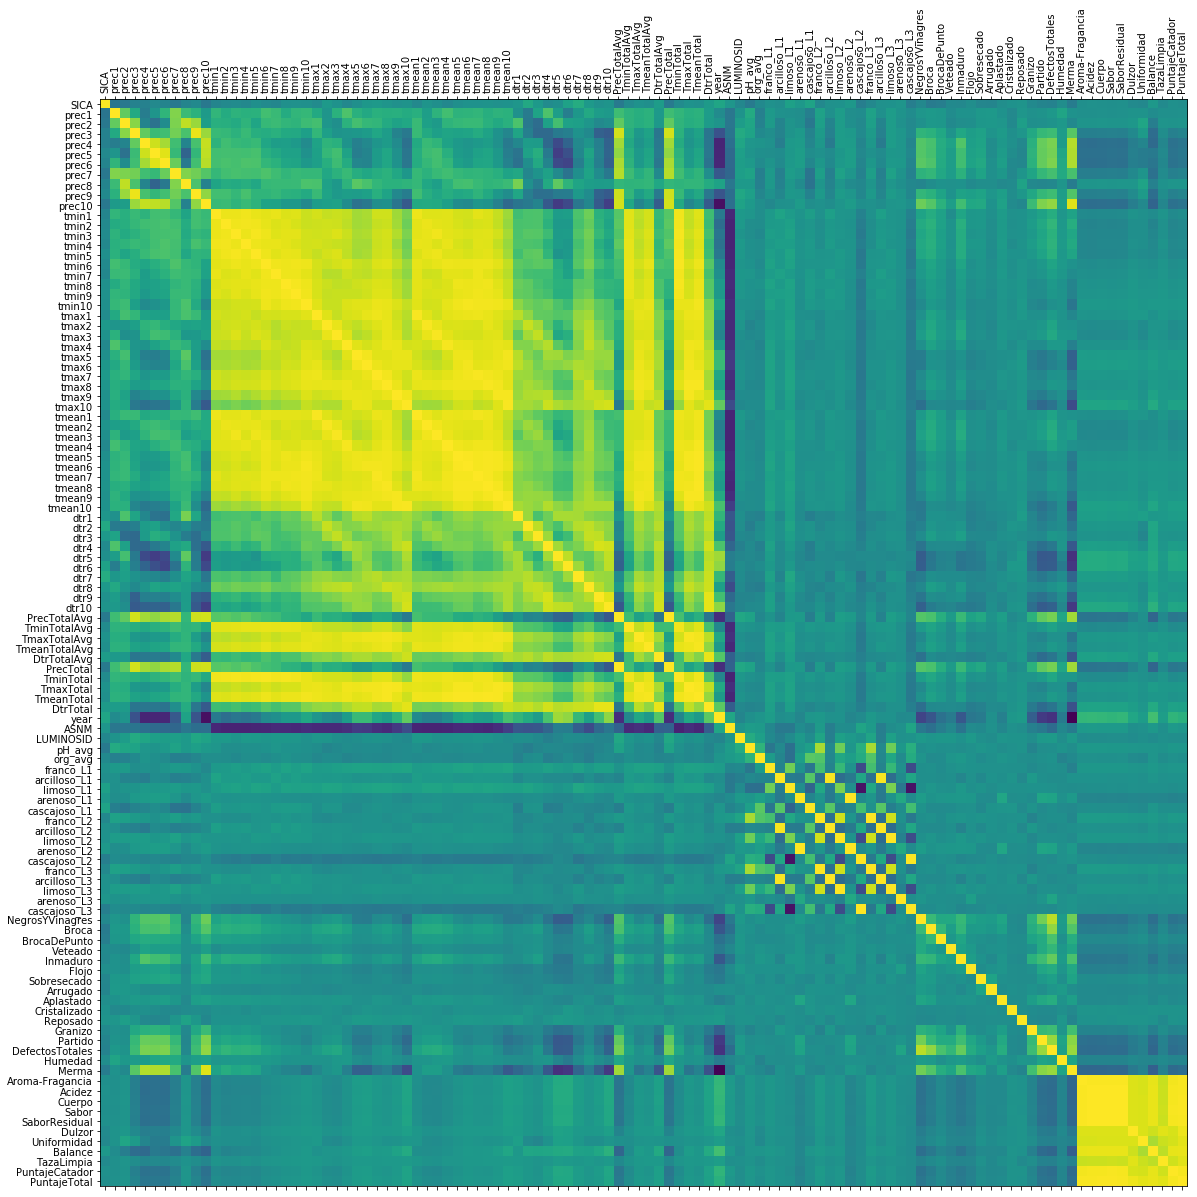

In [3]:
def plot_corr(df,size=20):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(df)

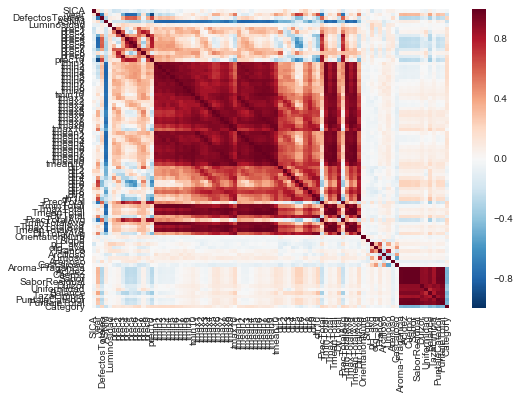

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

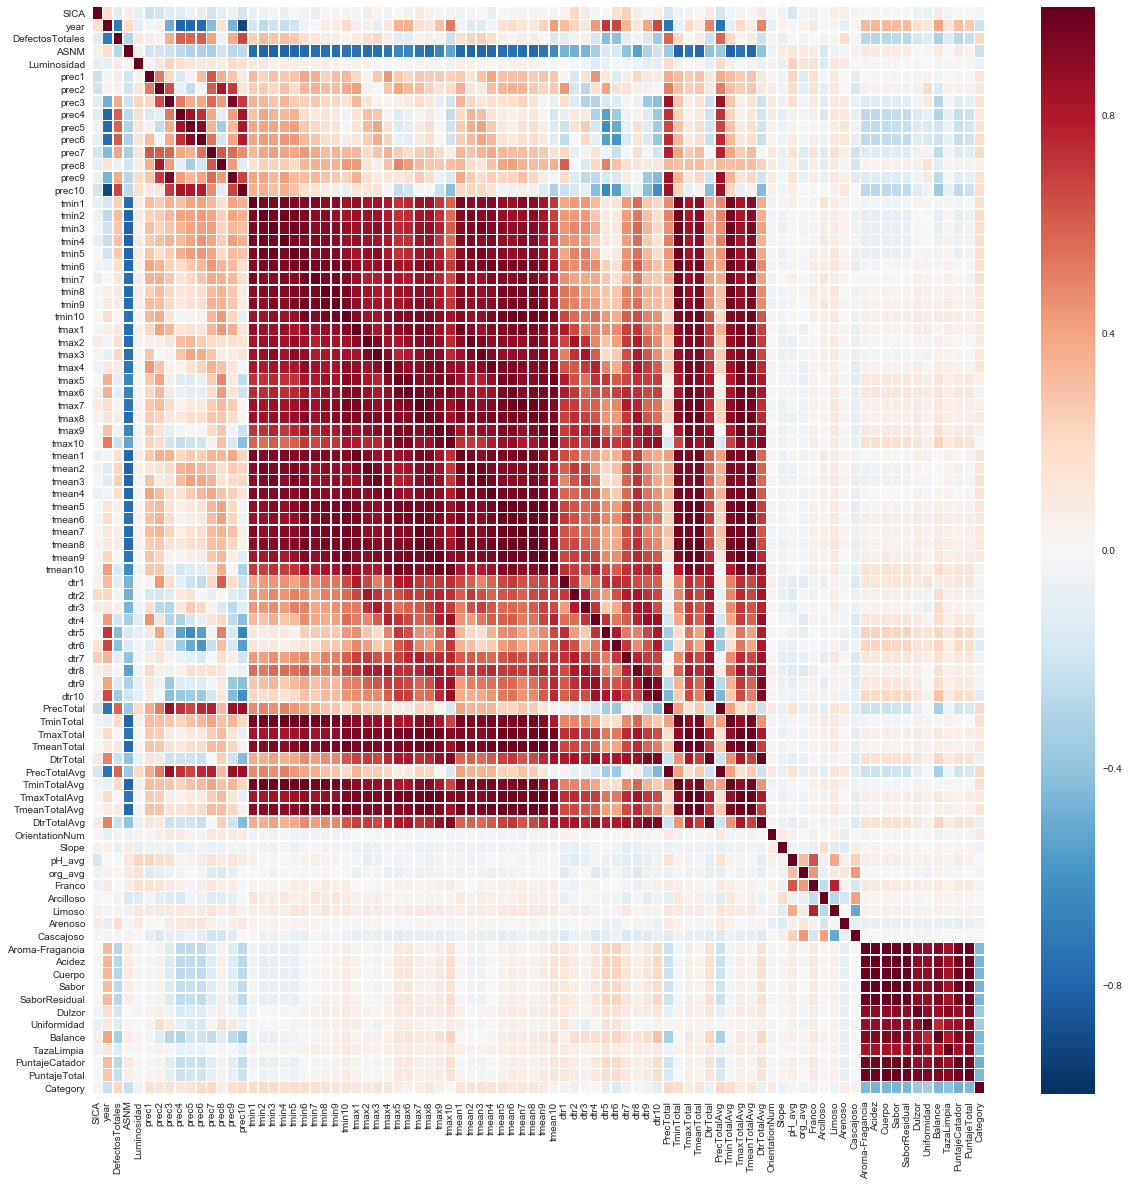

In [7]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=False, linewidths=.5, ax=ax)

Visiblement les précipitations ont une influence sur merma(déchets) -> entrainent une élimination plus ou moins il y en a





In [8]:
df.corr()

,SICA,year,DefectosTotales,ASNM,Luminosidad,prec1,prec2,prec3,prec4,prec5,...,Cuerpo,Sabor,SaborResidual,Dulzor,Uniformidad,Balance,TazaLimpia,PuntajeCatador,PuntajeTotal,Category
SICA,1.000000,0.174699,-0.110621,0.056766,-0.075154,-0.217476,-0.196783,-0.111254,-0.117818,-0.055410,...,0.006562,0.000098,0.006548,-0.042984,-0.063153,0.069551,-0.040526,0.003472,-0.009972,-0.030707
year,0.174699,1.000000,-0.704874,0.181952,-0.088592,-0.030532,0.039278,-0.491381,-0.790398,-0.776700,...,0.327460,0.313104,0.323340,0.183115,0.110336,0.396696,0.113712,0.306585,0.270498,-0.213397
DefectosTotales,-0.110621,-0.704874,1.000000,-0.286017,0.091976,0.069177,0.033564,0.372853,0.597033,0.581813,...,-0.284218,-0.272835,-0.280638,-0.172331,-0.120382,-0.327763,-0.119944,-0.275317,-0.241590,0.214167
ASNM,0.056766,0.181952,-0.286017,1.000000,0.041738,-0.202533,-0.200634,-0.217700,-0.260698,-0.308207,...,0.078429,0.079989,0.077340,-0.001577,0.011684,0.071702,-0.003322,0.083918,0.052714,-0.226028
Luminosidad,-0.075154,-0.088592,0.091976,0.041738,1.000000,0.026721,0.110509,0.225451,0.175187,0.132358,...,-0.015776,-0.010171,-0.009987,-0.021858,-0.004702,-0.022371,0.009264,-0.012482,-0.012308,-0.050989
prec1,-0.217476,-0.030532,0.069177,-0.202533,0.026721,1.000000,0.523344,0.213604,-0.150881,0.041817,...,0.010807,0.010138,0.012250,0.027931,0.030600,-0.024268,0.004889,0.009455,0.011325,0.139257
prec2,-0.196783,0.039278,0.033564,-0.200634,0.110509,0.523344,1.000000,0.647615,-0.092064,-0.244383,...,0.041719,0.035714,0.038629,0.059314,0.177921,-0.138766,0.036488,0.031264,0.041608,0.116553
prec3,-0.111254,-0.491381,0.372853,-0.217700,0.225451,0.213604,0.647615,1.000000,0.521127,0.368200,...,-0.125519,-0.118556,-0.122206,-0.044750,0.091155,-0.282755,-0.016095,-0.122857,-0.093453,0.142250
prec4,-0.117818,-0.790398,0.597033,-0.260698,0.175187,-0.150881,-0.092064,0.521127,1.000000,0.847754,...,-0.258614,-0.248183,-0.257095,-0.144490,-0.087322,-0.301596,-0.082454,-0.246652,-0.213041,0.110975
prec5,-0.055410,-0.776700,0.581813,-0.308207,0.132358,0.041817,-0.244383,0.368200,0.847754,1.000000,...,-0.246895,-0.231993,-0.242026,-0.125872,-0.157348,-0.183667,-0.055111,-0.224371,-0.195230,0.129893


Nous avons une forte corrélation entre les données climatiques -> logique mais aussi une très forte corrélation entre les résultats de données de dégustation. 

# Corrélations entre les entrées

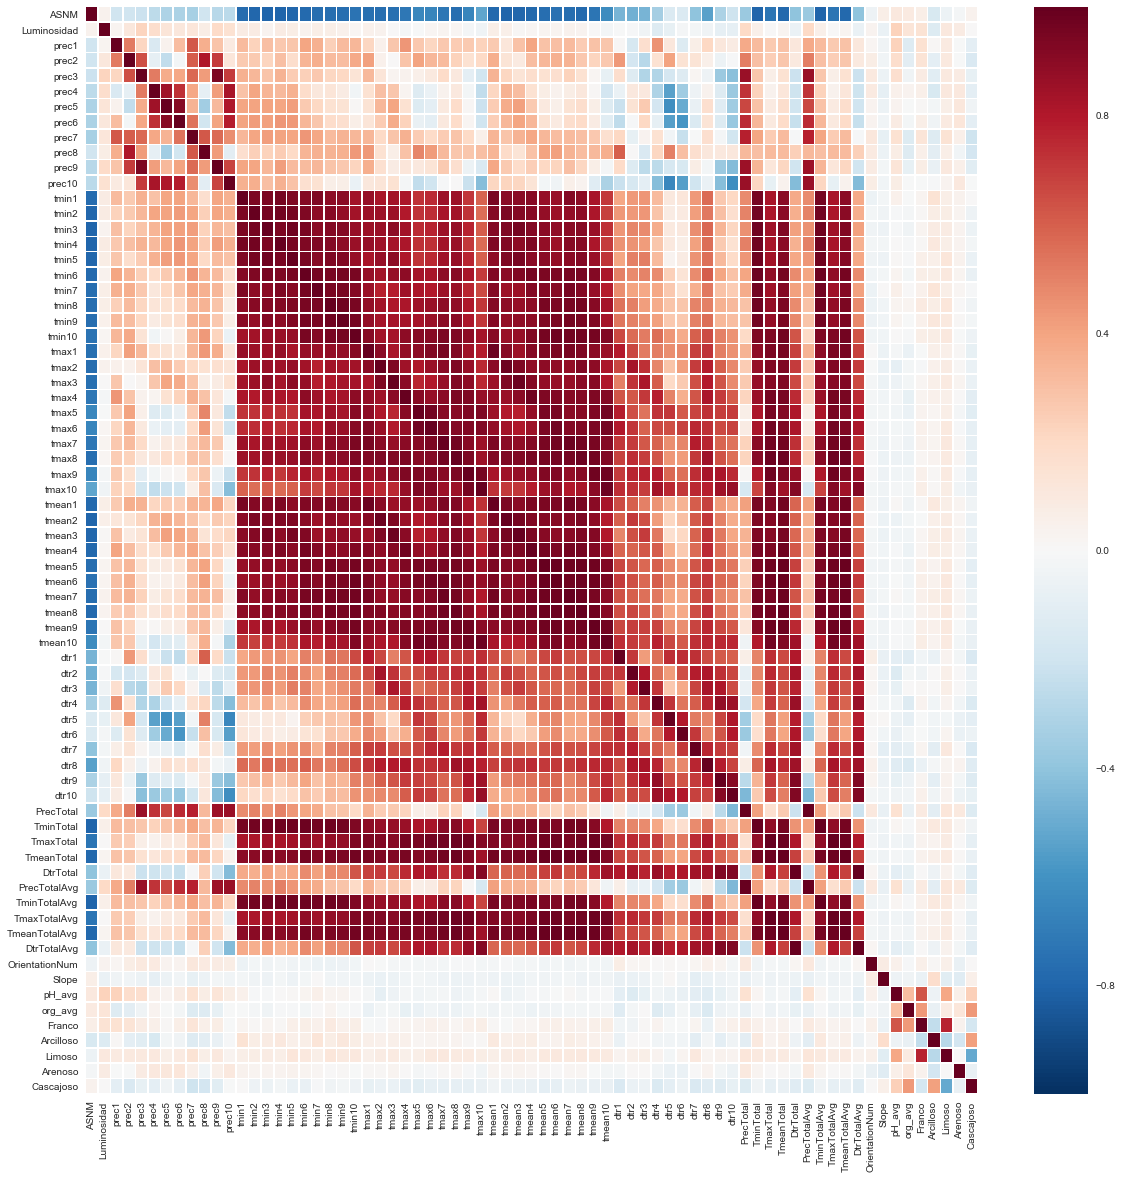

In [11]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df[inputs].corr(), annot=False, linewidths=.5, ax=ax)

On peut observer que les données de sol et le climat n'ont presque aucun lien. 

# Corrélation entre les sorties

In [14]:
for c in df.columns:
    print c

SICA
year
DefectosTotales
ASNM
Luminosidad
prec1
prec2
prec3
prec4
prec5
prec6
prec7
prec8
prec9
prec10
tmin1
tmin2
tmin3
tmin4
tmin5
tmin6
tmin7
tmin8
tmin9
tmin10
tmax1
tmax2
tmax3
tmax4
tmax5
tmax6
tmax7
tmax8
tmax9
tmax10
tmean1
tmean2
tmean3
tmean4
tmean5
tmean6
tmean7
tmean8
tmean9
tmean10
dtr1
dtr2
dtr3
dtr4
dtr5
dtr6
dtr7
dtr8
dtr9
dtr10
PrecTotal
TminTotal
TmaxTotal
TmeanTotal
DtrTotal
PrecTotalAvg
TminTotalAvg
TmaxTotalAvg
TmeanTotalAvg
DtrTotalAvg
OrientationNum
Slope
pH_avg
org_avg
Franco
Arcilloso
Limoso
Arenoso
Cascajoso
Aroma-Fragancia
Acidez
Cuerpo
Sabor
SaborResidual
Dulzor
Uniformidad
Balance
TazaLimpia
PuntajeCatador
PuntajeTotal
Category


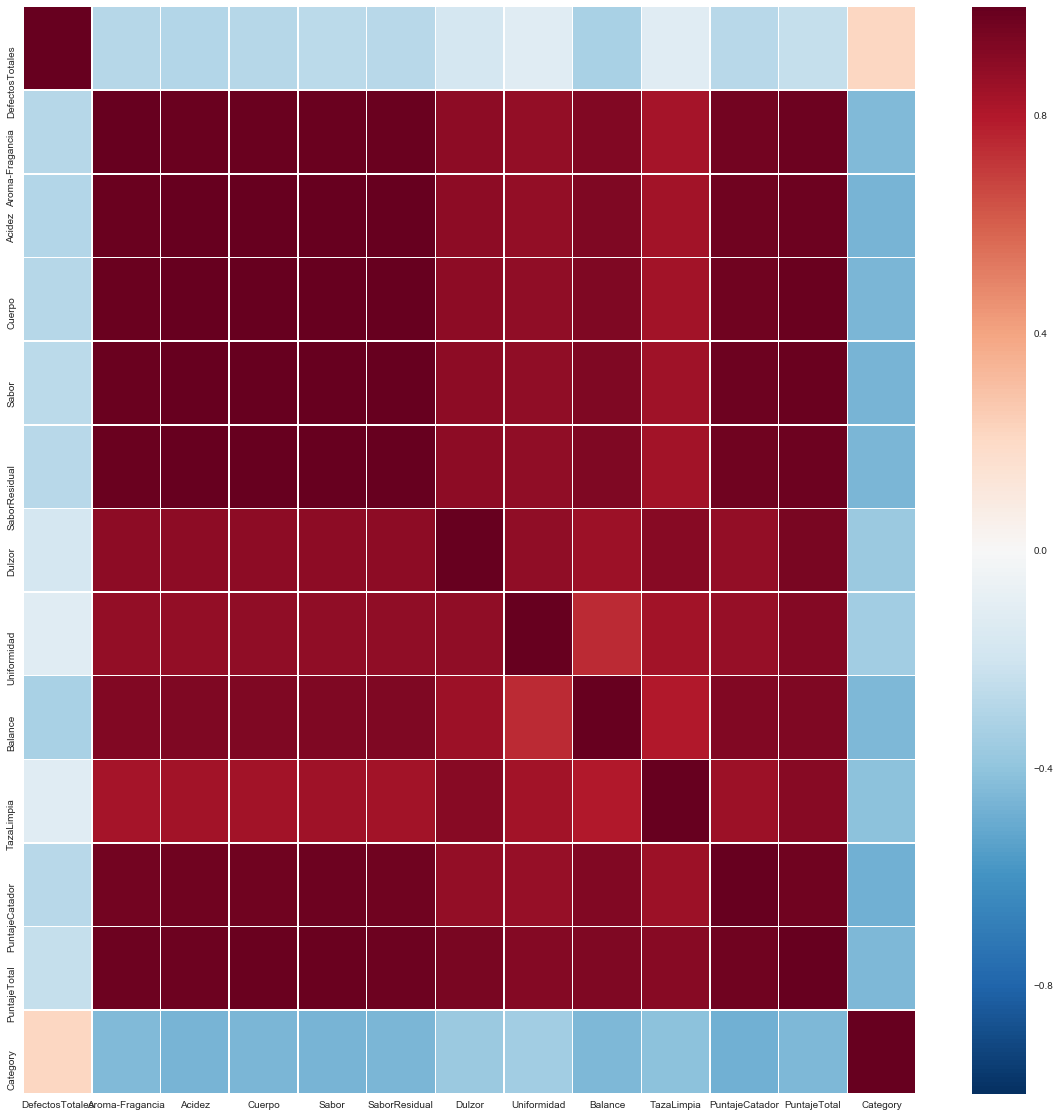

In [12]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df[outputs].corr(), annot=False, linewidths=.5, ax=ax)

Le nombre de points (données de dégustation) et les aspects physiques du grain ne sont que très peux corrélé. En revanche, les notations en points sont fortement corrélées entre elles. 

Les défauts physiques sont très peu corrélées entre-eux. 

In [23]:
cols = ["ASNM","Slope","OrientationNum","Franco","Arcilloso","Limoso","Arenoso",
        "Cascajoso","pH_avg","org_avg","PrecTotalAvg","TminTotalAvg","TmaxTotalAvg","TmeanTotalAvg",
        "DtrTotalAvg","Luminosidad","DefectosTotales","PuntajeTotal","Category"]

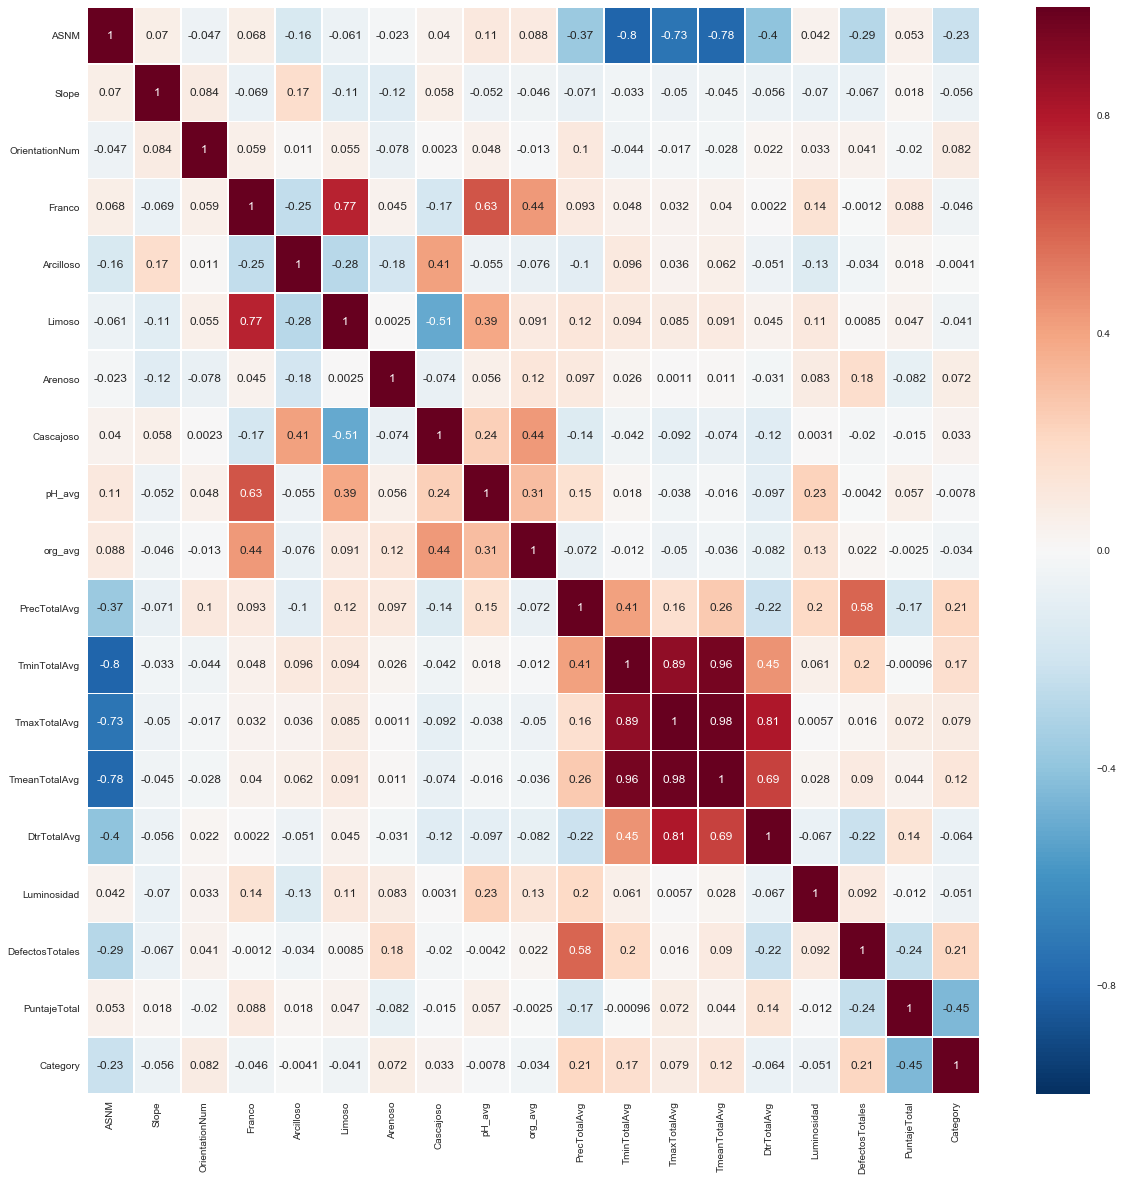

In [24]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df[cols].corr(), annot=True, linewidths=.5, ax=ax)

Le changement de variables pour la texture des sols fait ressortir des liens entre la qualité des sols et la texture. Cela confirme que c'est un bon choix. 

Lien entre précipitation et défauts physiques -> améliorer les processus dans les zones pluvieuse pour plus de rendement

